In [49]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
import pandas as pd
import numpy as np
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from fractions import Fraction
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from sympy import Rational as R
from sympy import Matrix as M
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML
import statsmodels.stats.power as smp
import statsmodels.api as sm


## Wiseflow Exam 2021


## Exercise 1 </br>

Consider a normal random sample X1,X2,…,X9, where N(μ,σ2) for i=1,…,9 and where both μ∈R and σ2>0 are unknown parameters. Assume we made the following observations:


In [31]:
a =[ -1.7, 2.2, 3.2, -0.8, 2.0, 0.7, -2.2, 0.5, 3.0]
alpha = 0.1
sample_size = len(a)
sample_mean = np.mean(a)
hypothesis_mean = 1 ## null hypothesiss

## two sided crit value
ddof = sample_size - 1
t_crit_ddof = stats.t.ppf(1-alpha/2,ddof)
display(Math('t_{\\frac{0.01}{2},19}='+latex(round(t_crit_ddof,4))))

##  By default, ddof is set to 0, which corresponds to the population standard deviation. When ddof is set to 1, it calculates the sample standard deviation.
sample_standard_deviation = np.std(a,ddof=1)## small s

test_statistic_hypothesis = (sample_mean-hypothesis_mean)/( sample_standard_deviation/np.sqrt(sample_size))
display(Math( 't_{0}='+ latex(round(test_statistic_hypothesis,4))))

## notice we are using sf function, alternative use 1-cdf
## additionally this is a one sided tail test, so to test 
p_value = 2*t.sf(np.abs(test_statistic_hypothesis), sample_size-1)
display(Math( 'P-value='+ latex(round(p_value,3))))

print('7. Conclusions:  From t-score table we find for a t distribution with 24 degrees of freedom that t0 = 3.56 \n falls between two values: 3.467, for which α = 0.001, and 3.745, for which α = 0.0005. \n As this is a two-tailed test, we know that the P-value is between those two values, that is, 0.0005 < P < 0.001. \n Therefore, because P > 0.0025, because alpha/2, we  reject H0 and conclude \n that the true mean of females body temperature  differs from 98.6 at alpha= 0.05')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

7. Conclusions:  From t-score table we find for a t distribution with 24 degrees of freedom that t0 = 3.56 
 falls between two values: 3.467, for which α = 0.001, and 3.745, for which α = 0.0005. 
 As this is a two-tailed test, we know that the P-value is between those two values, that is, 0.0005 < P < 0.001. 
 Therefore, because P > 0.0025, because alpha/2, we  reject H0 and conclude 
 that the true mean of females body temperature  differs from 98.6 at alpha= 0.05


## Exercise 2 </br>

Consider a normal random sample X1,X2,…,X9, where N(μ,σ2) for i=1,…,9 and where both μ∈R and σ2>0 are unknown parameters. Assume we made the following observations:


## Exercise 3 </br>


a. Find P(X=1 or Y=1). State your input as an integer between 0 and 99 such that the answer has two decimal precision, correctly rounded off.


In [50]:
poisson_lambda = 2
poisson_result = poisson.pmf(1, poisson_lambda)
display(Math("P(X = 1) = " + repr(round(poisson_result, 4))))

## provide the fraction like this 
geometric_probability = 1/3
geometric_result = geom.pmf(1, geometric_probability)
display(Math("P(Y = 1) = " + repr(round(geometric_result, 4))))

prob_or = poisson_result + geometric_result - (poisson_result * geometric_result)
display(Math("P(X = 1 OR Y =1) = " + repr(round(prob_or, 2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

b. Find $P(Y=2∣X+Y=2)$. State your inputs as two integers between 0 and 99 such that you supply an irreducible fraction. </br>
$P(Y=2∣X+Y=2)= \frac{P(Y=2 \cap X+Y=2)}{ P(X+Y=2)}= \frac{P(Y=2)*P(X=0)}{ P(X+Y=2)}=$</br>
$\frac{P(Y=2)*P(X=0)}{P(X=0)*P(Y=2)+P(X=1)*P(Y=1)+P(X=2)*P(Y=0)}$


In [4]:

P_Ec_1 = geom.pmf(2, geometric_probability) * poisson.pmf(0, poisson_lambda)
P_Ec_2 = poisson.pmf(0, poisson_lambda) * geom.pmf(2, geometric_probability) + poisson.pmf(1, poisson_lambda) * geom.pmf(1, geometric_probability) +  poisson.pmf(2, poisson_lambda) * geom.pmf(0, geometric_probability)
Ec_result = P_Ec_1/P_Ec_2
display(Math("P(Y = 2 | X+Y =2) = " + repr(round(Ec_result, 2))))

<IPython.core.display.Math object>

c)Find the following values. State your answers as integers between 0 and 99 </br>
$E[X+Y]=$ </br>
$E[(X+Y)^2]= E[X^2]+2COV(x,y)+E[Y^2]$</br >
If the values are independent the covariance of two random varibles is 0. </br>
If they are not independent, this is the formula. </br>
Cov(X, Y) = E[(X - E[X])(Y - E[Y])],</br>
where Cov(X, Y) represents the covariance between variables X and Y, E[X] represents the expected value (mean) of X, E[Y] represents the expected value (mean) of Y, and (X - E[X]) and (Y - E[Y]) represent the deviations from the means of X and Y, respectively.
Here's a step-by-step process to calculate the covariance:

   1. Calculate the expected value (mean) of X. If you have a set of observed values for X, you can calculate the mean by summing all the values and dividing by the total number of values.

    E[X] = (Sum of all X values) / (Number of X values)

   2. Calculate the expected value (mean) of Y. Similarly, calculate the mean of the observed values for Y.

    E[Y] = (Sum of all Y values) / (Number of Y values)

   3. Calculate the deviations from the means for X and Y. Subtract the mean of each variable from their respective observed values.

    Deviation_X = X - E[X]
    Deviation_Y = Y - E[Y]

   4. Calculate the product of the deviations for each pair of X and Y values.

    Product = Deviation_X * Deviation_Y

   5. Sum up all the products obtained in step 4.

    Sum_of_Products = (Sum of all Product values)

   6. Divide the sum of products by the total number of values to get the covariance.

    Cov(X, Y) = Sum_of_Products / (Number of values) </br>
$

In [107]:
## first ecuation
poisson_lambda = 2
expectedvalue_poisson = poisson_lambda

geometric_probability = 1/3
expectedvalue_geometric = 1/geometric_probability

expectedvalue_result = expectedvalue_poisson + expectedvalue_geometric
display(Math("E[X+Y] = " + repr(round(expectedvalue_result, 4))))
## second ecuation

## Variance calculation
##Variance of X and Y
Var_X = poisson_lambda  # For Poisson distribution, variance = mean
Var_Y = (1 - geometric_probability) / geometric_probability**2  ## Geometric distribution

# var(x+y) = E[(x+y)²] - E[x+y]²
# E[(x+y)²] = var(x+y) + E[x+y]² = var(x) + var(y) + E[x+y]²
my_e = (1-geometric_probability)/geometric_probability**2 + poisson_lambda + expectedvalue_result**2
display(Math("E[(X+Y)^2] = " + repr(my_e)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Exercise 4 </br>

Let X denote a stochastic variable with the following cumulative distribution function: </br>
$f(x)=\begin{bmatrix}0,for&x < 0 \cr x^3,for 0 < x < 1 \cr 0, otherwise\end{bmatrix}$ </br>


**a)** Find the probability that X>$\frac{4}{5}$ given that X>$\frac{1}{2}$. State your input as an integer between 0 and 99 such that the answer has two decimal precision, correctly rounded off </br>
$P(X> \frac{4}{5} | X> \frac{1}{2}) = \frac{P(X>\frac{4}{5} \cap X >\frac{1}{2})}{P(X>\frac{1}{2})}=$</br>
$\frac{P(X>\frac{4}{5})}{P(X>\frac{1}{2})}$

In [102]:
x = symbols('x')

fx = x**3

differential = sp.diff(fx,x)


Fx_1 = sp.integrate(differential,(x, R(4,5), 1))
Fx_2 = sp.integrate(differential,(x, R(1,2), 1))

result = Fx_1/Fx_2
print(round(result,2))

0.56


**b)** Find the expected value of X. State your inputs as two integers between 0 and 99 such that the answer is an irreducible fraction.


In [101]:
x = symbols('x')

fx = x**3

differential = sp.diff(fx,x)

e_x = x*differential

EX = sp.integrate(e_x, (x, 0, 1))

display(Math(r'E(X) = '+ '%s' % (EX)))


<IPython.core.display.Math object>

## Exercise 5 </br>
Let X and Y denote two stochastic variables with the following joint probability density function:


Find $P(X<\frac{Y}{2})$ State your inputs as integers between 0 and 99 such that the answer is an irreducible fraction.

In [11]:
x,y = symbols('x y')

fx = 1
## by trying to find the probability of y/2, you change also the domain of Y
## and their interesction is from 0 to x/2, hence the integral below
result = sp.integrate(fx, (y, 0, 1/2),(x, 0, 1/2)) 

display(Math(r'E(X) = '+ '%s' % (result)))

<IPython.core.display.Math object>

## Exercise 6 </br>


In [35]:
display(Image(url='../images/Screenshot 2023-06-04 at 21.06.29.png', width=1200, height=200,unconfined=True))

Correlation coefficient: notation Rho = $\rho$ </br>
The correlation coefficient $\rho_{XY}$ or  $\rho(X,Y)$ is obtained by normalizing the covarriance. More specifically we use the standardized version of X and Y. </br>
u = $\frac{X-EX}{\sigma_X}$ , v = $\frac{Y-EY}{\sigma_Y}$  </br>
$\rho$ = Cov(U,V)= Cov($\frac{X-EX}{\sigma_X}$,$\frac{Y-EY}{\sigma_Y}$)  </br>
= Cov($\frac{X}{\sigma_X}$,$\frac{Y}{\sigma_Y}$) (property 4) </br>
= $\frac{Cov(X,Y) }{\sigma_X*\sigma_Y}$ (property 5) </br>
<span style="color:red;">LOOK AT THIS AGAIN</span>

In [31]:
from fractions import Fraction
## these are some properties from the class, found them in the copybook they are described above
## by using the property 5 we get that
# since the  X and Y are indepenent, then the Cov(X,Y)= 0 this results in
variance_x = 4
variance_y = 9

cov_x_y = 1
result =cov_x_y/(np.sqrt(4)*np.sqrt(9))

## represent a number as a fraction
fraction = Fraction(result).limit_denominator()
simplified_fraction = Fraction(fraction.numerator, fraction.denominator)

display(Math(r'\rho(X,Y) = '+ '%s' % (simplified_fraction)))



<IPython.core.display.Math object>

## Exercise 7 </br>
In the city of Aarhus you can borrow a bike at either Dokk1 (Place 1), the train station (Place 2) or The Old Town (Place 3). It is assumed that the bike moves around between these three places from day to day as a Markov Chain with the following transition matrix (where the place number equals the row/column number, indexing from 1):

a. What is the probability that the bike will be in The Old Town (Place 3) after two days? State your answer as an integer between 0 and 99 such that you supply two decimal precision, correctly rounded off.

## Exercise 8 

In [34]:
display(Image(url='../images/Screenshot 2023-06-04 at 21.49.10.png', width=1200, height=200,unconfined=True))

**Sample Size for Specified Error on the Mean, Variance Known** </br>
If x is used as an estimate of μ, we can be 100(1 − α)% confident that the error |$\overline{x}$ − μ| </br>
will not exceed a specified amount E when the sample size is
n = $\frac{z_{\frac{\alpha}{2}}* \sigma}{E}$

In [109]:
confidence_level = 0.95  # Desired confidence level (e.g., 0.95 for a 95% confidence interval)
alpha = 1 - confidence_level  # Significance level (e.g., 0.05 for a 95% confidence interval)

def z_crit(alpha, two_sided=True): # two sided critical value, change for 1-alfa for one sided
    if two_sided:
        return stats.norm.ppf(1- alpha/2)
    else:
        return stats.norm.ppf(1-alpha)
    
Z0 = z_crit(alpha)
## Formula from the book on Sample Size for Specified Error on the Mean, Variance Known
variance = 1
error = 0.4
n = (Z0*variance/error)**2
print(n)

24.009117629338277


## Exercise 9

In [38]:
display(Image(url='../images/Screenshot 2023-06-04 at 22.35.27.png', width=1200, height=200,unconfined=True))

In [99]:
x,y,c = sp.symbols('x,y,c')

f_x_y = c*x*y

# S1: this is in between y = x+1 and y = 3-x
s_1 = sp.integrate( sp.integrate(f_x_y, (y,3-x,x+1)), (x,1,2))
# S2: this is in between y = x -1 and y = x+1
s_2 = sp.integrate( sp.integrate(f_x_y, (y,x-1,x+1)), (x,2,3))
# S3: this is in between y = x-1 and y = 7-x
s_3 = sp.integrate( sp.integrate(f_x_y, (y,x-1,7-x)), (x,3,4))

## sum all the surfaces and solve the ecuation

display(sp.solve(s_1 + s_2 + s_3 - 1,c))

## Exercise 10

In [64]:
display(Image(url='../images/Screenshot 2023-06-05 at 10.05.08.png', width=1200, height=400,unconfined=True))

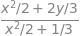

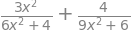

In [111]:
x,y = symbols('x y')

f_x_y = R(1,2)*x**2 + R(2,3)*y 

## calc the func first then the other stuff then the expected value
f_y_given_x = f_x_y / sp.integrate(f_x_y,(y,0,1))

display(f_y_given_x)

## expected value
e_y_given_x = y * f_y_given_x
result = sp.integrate(e_y_given_x, (y,0,1))
display(result)

## replace x=0 and integrate the expected value, an alternative
display(sp.integrate(y * 2*y, (y,0,1)))


## Exercise 11

In [74]:
display(Image(url='../images/Screenshot 2023-06-05 at 10.58.55.png', width=1200, height=400,unconfined=True))

In [88]:
## negative binomial / no of trials until n successes
n=4 ## no of successes
p=0.3 ## prob of being at traffic light

negative_binomial = n/p
print(negative_binomial) ## 40/3


## binomial distribution
x = 9 ##no of successes, we will put 6 since we include 5 as well
n =  15 ## no of trials
p = 1 - p ## probability since it is bigger 

display(Math("P(X \geq 5) = " + repr(round(binom.cdf(x, n, p), 2))))


13.333333333333334


<IPython.core.display.Math object>

## Exercise 12

In [121]:
display(Image(url='../images/Screenshot 2023-06-07 at 20.31.31.png', width=1200, height=400,unconfined=True))

In [124]:
x = np.array([0.93, 0.47, 0.26, 0.16, 0.74, 0.93, 0.36, 0.48, 0.49, 0.84, 0.77, 0.97])
y = np.array([8.56, 5.98, 6.83, 5.26, 7.51, 8.41, 6.72, 6.82, 5.14, 7.56, 6.64, 9.78])

sample_size_x = np.size(x)

## 2: means
x_mean =np.mean(x)
y_mean = np.mean(y)

display(Math( '\mu_x = '+ latex(round(x_mean,3))))
display(Math( '\mu_y = '+ latex(round(y_mean,3))))

## 1: Sx'es 
Sxy = np.sum(x*y) - sample_size_x*x_mean*y_mean
Sxx = np.sum(x*x) - ((np.sum(x)**2))/sample_size_x
display(Math( 'Sxy = '+ latex(round(Sxy,4))))
display(Math( 'Sxx = '+ latex(round(Sxx,4))))

## 3: betas
b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean

display(Math( '\\beta_1 = '+ latex(round(b1,4))))
display(Math( '\\beta_0 = '+ latex(round(b0,4))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [123]:
display(Image(url='../images/Screenshot 2023-06-07 at 20.31.41.png', width=1200, height=200,unconfined=True))

In [125]:
level = 0.95
t_score = stats.t.ppf(((1-level)/2),(sample_size_x-2))

# regression function
def f(x):
    return b1*x + b0

y_hat = f(x)

SSe = np.sum((y-y_hat)**2)    # residual sum of squares (unexplained deviation)
varhat = SSe/(sample_size_x-2)           # variance of x

ErrorSlope = t_score*math.sqrt((varhat/Sxx))
display(round(round(b1,4)-abs(ErrorSlope), 4), round(round(b1,4) + abs(ErrorSlope), 4))